<h1 style="font-size:2em">Projet 4 - Anticipez les besoins en consommation de bâtiments (Regressions)</h1>

# Objectifs

~~DummyRegressor~~, ~~Ridge~~, ~~Lasso~~ -> a utiliser  
GridSearshCV (R2, RMSE, MAE) / Nb k-folds   
0.1 1 10 100 -> log(N) -> Marche mieux    
Algo linéaire, non linéaire, ~~GradiantBoost (X)GBoost, Arbre de décision~~   
Conclusion powerpoint: Pistes d'amélioration du projet

- **Objectif:** Ville de Seattle neutre en émissions de carbone en 2050
- Analyse sur la consommation et aux émissions des bâtiments **non destinés à l’habitation.**  
- Comparer une estimation avec des features classiques et avec la feature **ENERGYSTARScore**  
- Targets : **émissions de CO2** + **consommation totale d’énergie**

## Variables

- **OSEBuildingID** : L'ID du batiment	
- **DataYear** : Année de consommation
- **BuildingType** : Type de Building (Résidence ou pas)
- **PrimaryPropertyType** : Type de propriété (Hotel, Ecole...)
- **PropertyName** : Nom du bâtiment
- **Address** : L'adresse du bâtiment
- **City** : La ville ou est situé le bâtiment
- **State** : L'état ou est situé le bâtiment
- **ZipCode** : Code postal (peut etre différent même dans un même état)
- **TaxParcelIdentificationNumber** : Numero identification (fiscale)
- **CouncilDistrictCode** : code du district du conseil de la ville de Seattle  
- **Neighborhood** : Quartier
- **Latitude** : La latitude
- **Longitude** : La longitude
- **YearBuilt** : Date de création ou de rénovation  
- **NumberofBuildings** : Nombre de buildings dans la propriété
- **NumberofFloors** : Nombre d'étages
- **PropertyGFATotal** : Surface brute de plancher totale du bâtiment et du parking 
- **PropertyGFAParking** : Espace brute de tous les types de stationnement  
- **PropertyGFABuilding(s)** : Surface brute du bâtiment  
- **ListOfAllPropertyUseTypes** : Types d'utilisation de la propriété  
- **LargestPropertyUseType** : Type d'utilisation principale de la propriété 
- **LargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation principale)
- **SecondLargestPropertyUseType** : Type d'utilisation secondaire de la propriété 
- **SecondLargestPropertyUseTypeGFA**: Surface brute de plancher (Utilisation secondaire) 
- **ThirdLargestPropertyUseType** : Type d'utilisation tertiaire de la propriété 
- **ThirdLargestPropertyUseTypeGFA** : Surface brute de plancher (Utilisation tertiaire) 
- **YearsENERGYSTARCertified** : Année auquel la propriété a recu la certification ENERGYSTAR
- **ENERGYSTARScore** : Score (de 1 a 100) qui calcule la performance énergétique d'un bien immobilier
- **SiteEUI(kBtu/sf)** : Energie annuelle consommée d'un bien immobilier / Surface brute de plancher
- **SiteEUIWN(kBtu/sf)** : SiteEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
- **SourceEUI(kBtu/sf)** : Energie annuelle consommée d'un bien immobilier (y compris les pertes) / Surface brute de plancher
- **SourceEUIWN(kBtu/sf)** : SourceEUI(kBtu/sf) normalisée en fonctions des conditions météologiques
- **SiteEnergyUse(kBtu)** : Quantité annuelle d'énergie consommée, toutes sources d'énergie confondues
- **SiteEnergyUseWN(kBtu)** : SiteEnergyUse(kBtu) normalisée en fonctions des conditions météologiques
- **SteamUse(kBtu)** : Quantité annuelle de vapeur urbaine consommée
- **Electricity(kWh)** : Quantité annuelle d'électricité consommée
- **Electricity(kBtu)** : Electricity mais en British thermal units (kBtu)
- **NaturalGas(therms)** : Quantité annuelle de gaz naturel consommée (therms)
- **NaturalGas(kBtu)** : NaturalGas mais en British thermal units (kBtu).
- **DefaultData** : A t'on utilisé des valeurs par défault (fausses valeurs) sur certaines features?
- **Comments** : Commentaires du propriétaire ajoutant du contexte sur les valeurs des features
- **ComplianceStatus** : Satisfait t'il aux exigences de l'analyse de la consommation d'énergie?
- **Outlier** : Ce bâtiment est il dans la moyenne ou exceptionnel?
- **TotalGHGEmissions** : Quantité totale d'émissions de (dioxyde de carbone + le méthane + l'oxyde nitreux)
- **GHGEmissionsIntensity** : TotalGHGEmissions / Surface brute de plancher de la propriété

# Imports et configs

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)

In [2]:
import pandas as pd 
df = pd.read_csv('DataCleaned.csv', sep = ",")

In [3]:
df.head()

,Age,Latitude,Longitude,NumberofBuildings,NumberofFloors,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,TotalGHGEmissions,SiteEnergyUseWN(kBtu),BuildingType_Campus,BuildingType_NonResidential,BuildingType_Nonresidential COS,BuildingType_SPS-District K-12,LargestPropertyUseType_Bank Branch,LargestPropertyUseType_Courthouse,LargestPropertyUseType_Data Center,LargestPropertyUseType_Distribution Center,LargestPropertyUseType_Financial Office,LargestPropertyUseType_Hospital (General Medical & Surgical),LargestPropertyUseType_Hotel,LargestPropertyUseType_K-12 School,LargestPropertyUseType_Medical Office,LargestPropertyUseType_Multifamily Housing,LargestPropertyUseType_Non-Refrigerated Warehouse,LargestPropertyUseType_Office,LargestPropertyUseType_Other,LargestPropertyUseType_Parking,LargestPropertyUseType_Refrigerated Warehouse,LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility,SecondLargestPropertyUseType_Adult Education,SecondLargestPropertyUseType_Bank Branch,SecondLargestPropertyUseType_Bar/Nightclub,SecondLargestPropertyUseType_College/University,SecondLargestPropertyUseType_Convenience Store without Gas Station,SecondLargestPropertyUseType_Data Center,SecondLargestPropertyUseType_Distribution Center,SecondLargestPropertyUseType_Financial Office,SecondLargestPropertyUseType_Hotel,SecondLargestPropertyUseType_K-12 School,SecondLargestPropertyUseType_Laboratory,SecondLargestPropertyUseType_Manufacturing/Industrial Plant,SecondLargestPropertyUseType_Multifamily Housing,SecondLargestPropertyUseType_Non-Refrigerated Warehouse,SecondLargestPropertyUseType_Office,SecondLargestPropertyUseType_Other,SecondLargestPropertyUseType_Other - Education,SecondLargestPropertyUseType_Other - Entertainment/Public Assembly,SecondLargestPropertyUseType_Other - Recreation,SecondLargestPropertyUseType_Other - Restaurant/Bar,SecondLargestPropertyUseType_Other - Services,SecondLargestPropertyUseType_Parking,SecondLargestPropertyUseType_Performing Arts,SecondLargestPropertyUseType_Pre-school/Daycare,SecondLargestPropertyUseType_Restaurant,SecondLargestPropertyUseType_Retail Store,SecondLargestPropertyUseType_Self-Storage Facility,SecondLargestPropertyUseType_Supermarket/Grocery Store,SecondLargestPropertyUseType_Worship Facility,ThirdLargestPropertyUseType_Bank Branch,ThirdLargestPropertyUseType_Bar/Nightclub,ThirdLargestPropertyUseType_Data Center,ThirdLargestPropertyUseType_Distribution Center,ThirdLargestPropertyUseType_Financial Office,ThirdLargestPropertyUseType_Fitness Center/Health Club/Gym,ThirdLargestPropertyUseType_Food Service,ThirdLargestPropertyUseType_Hotel,ThirdLargestPropertyUseType_Medical Office,ThirdLargestPropertyUseType_Multifamily Housing,ThirdLargestPropertyUseType_Non-Refrigerated Warehouse,ThirdLargestPropertyUseType_Office,ThirdLargestPropertyUseType_Other,ThirdLargestPropertyUseType_Other - Education,ThirdLargestPropertyUseType_Other - Entertainment/Public Assembly,ThirdLargestPropertyUseType_Other - Recreation,ThirdLargestPropertyUseType_Other - Restaurant/Bar,ThirdLargestPropertyUseType_Other - Services,ThirdLargestPropertyUseType_Other - Technology/Science,ThirdLargestPropertyUseType_Other/Specialty Hospital,ThirdLargestPropertyUseType_Parking,"ThirdLargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",ThirdLargestPropertyUseType_Refrigerated Warehouse,ThirdLargestPropertyUseType_Restaurant,ThirdLargestPropertyUseType_Retail Store,ThirdLargestPropertyUseType_Social/Meeting Hall,ThirdLargestPropertyUseType_Worship Facility,SteamUse(kBtu)_Usage,Electricity(kBtu)_Usage,NaturalGas(therms)_Usage
0,89,47.61220,-122.33799,1.0,12,88434.0,0.0,0.0,60.0,249.98,7456910.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

On a 2 targets: 
- TotalGHGEmissions
- SiteEnergyUseWN(kBtu)

On a aussi 2 facons de faire nos features:
- Tout prendre **SANS** ENERGYSTARScore
- Tout prendre **AVEC** ENERGYSTARScore

# Fonctions (pour ne pas alourdir le fichier)

## Création (X,Y) - (Train,Test)

In [4]:
def prepare_data(df, target_col, cols_to_drop, test_size=0.3, random_state=42):
    from sklearn.model_selection import train_test_split
    X = df.drop(cols_to_drop, axis=1)
    Y = df[target_col]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test

## Regression

### Naive (DummyRegressor)

Modèle simple utilisé pour créer une référence de base.   
Plutôt que d'apprendre à partir des données, ce modèle utilise des stratégies simples pour prédire les valeurs cibles.  
Dans ce code, les stratégies utilisés sont les suivantes:

    strategies = {
        'mean': {},
        'quantile': {'quantile': [0, 0.25, 0.5, 0.75, 1]},
    }

In [5]:
from sklearn.model_selection import ParameterGrid, cross_validate, KFold
from sklearn.dummy import DummyRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def evaluate_dummy_regressor(X_train, X_test, Y_train, Y_test):
    # On définit les métriques
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}

    strategies = {
        'mean': {},
        'quantile': {'quantile': [0, 0.25, 0.5, 0.75, 1]},
    }

    # Liste pour stocker les résultats
    results = []

    # Boucle sur les nombres de splits
    for n_splits in [5, 10]:
        # On définit les KFold pour la validation croisée
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Pour chaque stratégie
        for strategy, params in strategies.items():

            # Générer toutes les combinaisons de paramètres
            param_grid = ParameterGrid(params)

            for param_combination in param_grid:

                # Créer et adapter le modèle pour chaque combinaison de paramètres
                dummy = DummyRegressor(strategy=strategy, **param_combination)
                scores = cross_validate(dummy, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)

                # Enregistrer les scores et les paramètres pour chaque nombre de folds
                for fold in range(kf.get_n_splits()):
                    results.append({
                        'Folds': str(n_splits),
                        'strategy': strategy,
                        'params': param_combination,
                        'R2': scores['test_R2'][fold],
                        'RMSE': scores['test_RMSE'][fold],
                        'MAE': scores['test_MAE'][fold]
                    })

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)

    # Extraire les valeurs des paramètres
    results_df['param_value'] = results_df['params'].apply(lambda x: list(x.values())[0] if x else 'None')

    # Calculer la moyenne des scores pour chaque combinaison de paramètres
    mean_scores = results_df.groupby(['Folds', 'strategy', 'param_value']).mean(numeric_only=True).reset_index()

    # Ajouter un classement en fonction de R2, RMSE et MAE
    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)

    # Réorganiser les lignes en fonction de R2
    mean_scores = mean_scores.sort_values(by='R2_rank')

    # Réinitialiser l'index du DataFrame
    mean_scores = mean_scores.reset_index(drop=True)

    # Calculer la mesure agrégée des classements
    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank')
    mean_scores = mean_scores.reset_index(drop=True)
    
    # Calculer le classement final
    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min', ascending=True).astype(int)
    display(mean_scores)
    
    best_row = mean_scores.loc[mean_scores['Rank_final'] == 1]
    best_strategy = best_row['strategy'].values[0]
    best_param_value = best_row['param_value'].values[0]
    best_params = {best_strategy: best_param_value} if best_param_value != 'None' else {}

    best_model = DummyRegressor(strategy=best_strategy, **best_params)
    best_model.fit(X_train, Y_train)

    y_pred = best_model.predict(X_test)

    scores = pd.DataFrame({
        'Strategy': [best_strategy],
        'Parameter Value': [best_param_value],
        'R2_Test': [r2_score(Y_test, y_pred)],
        'RMSE_Test': [np.sqrt(mean_squared_error(Y_test, y_pred))],
        'MAE_Test': [mean_absolute_error(Y_test, y_pred)]
    })

    scores.index = ['Régréssion Dummy']
    return scores

### Linéaire

#### Regressions ridge/lasso/elasticnet

Régression linéaire régularisée.  

- **ridge** : pénalité L2 (alpha α)  
- **lasso** : pénalité L1 (alpha α)  
- **elasticnet** : pénalité L2 (alpha α) et l1_ratio (compris entre 0 et 1)

In [6]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np

def evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='ridge'):
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}
    kfolds = [KFold(n_splits=n_splits, shuffle=True, random_state=42) for n_splits in [5, 10]]
    alphas = np.logspace(-4, 4, 10)  
    l1_ratios = np.geomspace(start=1e-10, stop=1, num=10)  
    results = []

    param_grid = {'alpha': alphas}
    model_class = {'ridge': Ridge, 'lasso': Lasso}.get(regressor, None)

    if regressor == 'elasticnet':
        model_class = ElasticNet
        param_grid['l1_ratio'] = l1_ratios

    if model_class is None:
        raise ValueError(f"Invalid regressor: {regressor}. Must be 'ridge', 'lasso', or 'elasticnet'.")

    for params in ParameterGrid(param_grid):
        model = model_class(**params, max_iter=1000000)
        pipeline = make_pipeline(StandardScaler(), model)
        for kf in kfolds:
            scores = cross_validate(pipeline, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)
            for fold in range(kf.get_n_splits()):
                result = {
                    'Folds': kf.get_n_splits(),
                    'R2': scores['test_R2'][fold],
                    'RMSE': scores['test_RMSE'][fold],
                    'MAE': scores['test_MAE'][fold]
                }
                result.update(params)
                results.append(result)

    results_df = pd.DataFrame(results)
    group_cols = ['Folds'] + list(param_grid.keys())
    mean_scores = results_df.groupby(group_cols).mean(numeric_only=True).reset_index()
    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)
    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank').reset_index(drop=True)
    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min', ascending=True).astype(int)
    display(mean_scores.head(10))

    best_params = mean_scores.loc[mean_scores['Rank_final'] == 1, list(param_grid.keys())].to_dict('records')[0]
    best_model = make_pipeline(StandardScaler(), model_class(**best_params, max_iter=100000))
    best_model.fit(X_train, Y_train)
    
    # Display feature importance
    importance = best_model.named_steps[model_class.__name__.lower()].coef_
    # Obtenir les noms des fonctionnalités à partir des colonnes de X_train
    feature_names = X_train.columns

    # Normalisation des valeurs d'importance
    importance_normalized = np.abs(importance) / np.sum(np.abs(importance))

    # Création d'un DataFrame pour les noms de fonctionnalités et leur importance
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_normalized})

    # Trier le DataFrame par importance en ordre décroissant
    features_df = features_df.sort_values('Importance', ascending=False)

    # Exclure les fonctionnalités avec une importance de 0%
    features_df = features_df[features_df['Importance'] > 0]

    plt.figure(figsize=(10, 20))
    bars = plt.barh(features_df['Feature'], features_df['Importance']*100)  # Multiplier par 100 pour avoir des pourcentages
    plt.title(f'Importance des features pour la régression {regressor.capitalize()}')
    plt.ylabel('Features')  # Mettre les noms des fonctionnalités sur l'axe y
    plt.xlabel('Importance (%)')  # L'importance est maintenant en pourcentage
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que les caractéristiques les plus importantes soient en haut

    # Ajouter le pourcentage d'importance à côté de chaque barre
    for bar in bars:
        width = bar.get_width()
        if width < 1:
            label = '{:.2e}'.format(width) 
        else:
            label = f'{width:.2f}'  
        plt.text(width, 
                 bar.get_y() + bar.get_height()/2,
                 label,
                 va='center', 
                 ha='left') 

    plt.show()

    y_pred = best_model.predict(X_test)

    scores = {
        'R2_Test': r2_score(Y_test, y_pred),
        'RMSE_Test': np.sqrt(mean_squared_error(Y_test, y_pred)),
        'MAE_Test': mean_absolute_error(Y_test, y_pred)
    }
    scores.update(best_params)
    columns_order = list(best_params.keys()) + ['R2_Test', 'RMSE_Test', 'MAE_Test']
    scores_df = pd.DataFrame([scores], columns=columns_order, index=[f'Régression {regressor.capitalize()}'])
    return scores_df

### Non-Linéaire

#### XGBRegressor

- Utilise un modèle appelé **Gradient Boosting**, qui combine plusieurs modèles d'arbre de décision simplistes pour former un modèle plus puissant. Les arbres - Les arbres de décision sont construits successivement, où chaque nouvel arbre est ajusté pour corriger les erreurs du modèle précédent.


>**Hyperparamètres:** 
> - nombre d'arbres de décision à construire (n_estimators)
> - la vitesse d'apprentissage (learning_rate)


In [7]:
from xgboost import XGBRegressor
from sklearn.model_selection import ParameterGrid, cross_validate, KFold
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def evaluate_xgb_regressor(X_train, X_test, Y_train, Y_test):
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}

    n_estimators_choices = np.linspace(100, 500, 5, dtype=int)
    learning_rate_choices = np.linspace(0.01, 0.5, 5)

    hyperparameters = {
        'n_estimators': n_estimators_choices,
        'learning_rate': learning_rate_choices,
    }

    results = []

    for n_splits in [5, 10]:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        param_grid = ParameterGrid(hyperparameters)

        for param_combination in param_grid:
            xgb = XGBRegressor(**param_combination, n_jobs = 12)
            scores = cross_validate(xgb, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)

            for fold in range(kf.get_n_splits()):
                results.append({
                    'Folds': str(n_splits),
                    'params': param_combination,
                    'R2': scores['test_R2'][fold],
                    'RMSE': scores['test_RMSE'][fold],
                    'MAE': scores['test_MAE'][fold]
                })

    results_df = pd.DataFrame(results)

    results_df['n_estimators'] = results_df['params'].apply(lambda x: x['n_estimators'])
    results_df['learning_rate'] = results_df['params'].apply(lambda x: x['learning_rate'])

    mean_scores = results_df.groupby(['Folds', 'n_estimators', 'learning_rate']).mean(numeric_only=True).reset_index()

    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)

    mean_scores = mean_scores.sort_values(by='R2_rank')
    mean_scores = mean_scores.reset_index(drop=True)

    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank')
    mean_scores = mean_scores.reset_index(drop=True)

    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min').astype(int)
    display(mean_scores.head(10))

    best_row = mean_scores.loc[mean_scores['Rank_final'] == 1]
    best_n_estimators = best_row['n_estimators'].values[0]
    best_learning_rate = best_row['learning_rate'].values[0]
    best_params = {'n_estimators': best_n_estimators, 'learning_rate': best_learning_rate}

    best_model = XGBRegressor(**best_params, n_jobs = 12)
    best_model.fit(X_train, Y_train)

    # Display feature importance
    importance = best_model.feature_importances_
    # Obtenir les noms des fonctionnalités à partir des colonnes de X_train
    feature_names = X_train.columns

    # Normalisation des valeurs d'importance
    importance_normalized = np.abs(importance) / np.sum(np.abs(importance))

    # Création d'un DataFrame pour les noms de fonctionnalités et leur importance
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_normalized})

    # Trier le DataFrame par importance en ordre décroissant
    features_df = features_df.sort_values('Importance', ascending=False)

    # Exclure les fonctionnalités avec une importance de 0%
    features_df = features_df[features_df['Importance'] > 0]

    plt.figure(figsize=(10, 20))
    bars = plt.barh(features_df['Feature'], features_df['Importance']*100)  # Multiplier par 100 pour avoir des pourcentages
    plt.title(f'Importance des features pour la régréssion Gradiant Boosting')
    plt.ylabel('Features')  # Mettre les noms des fonctionnalités sur l'axe y
    plt.xlabel('Importance (%)')  # L'importance est maintenant en pourcentage
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que les caractéristiques les plus importantes soient en haut

    # Ajouter le pourcentage d'importance à côté de chaque barre
    for bar in bars:
        width = bar.get_width()
        if width < 1:
            label = '{:.2e}'.format(width)  
        else:
            label = f'{width:.2f}' 
        plt.text(width,  
                 bar.get_y() + bar.get_height()/2, 
                 label,  
                 va='center',  
                 ha='left')  

    plt.show()

    y_pred = best_model.predict(X_test)

    scores = pd.DataFrame({
        'n_estimators': [best_n_estimators],
        'learning_rate': [best_learning_rate],
        'R2_Test': [r2_score(Y_test, y_pred)],
        'RMSE_Test': [np.sqrt(mean_squared_error(Y_test, y_pred))],
        'MAE_Test': [mean_absolute_error(Y_test, y_pred)]
    })

    scores.index = ['Régression XGBoost']
    return scores

#### Forêt aléatoire

- On construit plusieurs arbres de décision indépendants et on combine leurs prédictions pour obtenir une prédiction finale plus robuste. Chaque arbre est construit en sélectionnant aléatoirement un sous-ensemble des données d'entraînement, ce qui permet d'introduire de la diversité dans les arbres.

- La prédiction finale est obtenue en moyennant (pour la régression) les prédictions de toues les arbres.

In [8]:
from sklearn.model_selection import ParameterGrid, cross_validate, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy as np

def evaluate_random_forest(X_train, X_test, Y_train, Y_test):
    # Définir les métriques
    scoring = {'R2': make_scorer(r2_score), 'RMSE': make_scorer(lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))), 'MAE': make_scorer(mean_absolute_error)}

    # Définir les hyperparamètres à tester
    
    n_estimators_choices = np.linspace(100, 500, 5, dtype=int)
    max_depth_choices = np.linspace(1, 20, 5, dtype=int)

    param_grid = {
        'n_estimators': n_estimators_choices,
        'max_depth': max_depth_choices,
    }
    

    # Liste pour stocker les résultats
    results = []

    # Boucle sur les nombres de splits
    for n_splits in [5, 10]:
        # Définir les KFold pour la validation croisée
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

        # Générer toutes les combinaisons de paramètres
        param_combinations = list(ParameterGrid(param_grid))

        # Pour chaque combinaison de paramètres
        for param_combination in param_combinations:
            n_estimators = int(param_combination['n_estimators'])
            max_depth = None if param_combination['max_depth'] is None else int(param_combination['max_depth'])

            # Créer et adapter le modèle pour chaque combinaison de paramètres
            rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs = 12)
            scores = cross_validate(rf, X_train, Y_train, cv=kf, scoring=scoring, return_train_score=True)

            # Enregistrer les scores et les paramètres pour chaque nombre de folds
            for fold in range(kf.get_n_splits()):
                results.append({
                    'Folds': str(n_splits),
                    'n_estimators': n_estimators,
                    'max_depth': max_depth,
                    'R2': scores['test_R2'][fold],
                    'RMSE': scores['test_RMSE'][fold],
                    'MAE': scores['test_MAE'][fold]
                })

    # Convertir les résultats en DataFrame
    results_df = pd.DataFrame(results)

    # Calculer la moyenne des scores pour chaque combinaison de paramètres
    mean_scores = results_df.groupby(['Folds', 'n_estimators', 'max_depth']).mean(numeric_only=True).reset_index()

    # Ajouter un classement en fonction de R2, RMSE et MAE
    mean_scores['R2_rank'] = mean_scores['R2'].rank(method='min', ascending=False).astype(int)
    mean_scores['RMSE_rank'] = mean_scores['RMSE'].rank(method='min').astype(int)
    mean_scores['MAE_rank'] = mean_scores['MAE'].rank(method='min').astype(int)

    # Réorganiser les lignes en fonction de R2
    mean_scores = mean_scores.sort_values(by='R2_rank')

    # Réinitialiser l'index du DataFrame
    mean_scores = mean_scores.reset_index(drop=True)

    # Calculer la mesure agrégée des classements
    mean_scores['Aggregate_rank'] = mean_scores[['R2_rank', 'RMSE_rank', 'MAE_rank']].mean(axis=1)
    mean_scores = mean_scores.sort_values(by='Aggregate_rank')
    mean_scores = mean_scores.reset_index(drop=True)
    
    # Calculer le classement final
    mean_scores['Rank_final'] = mean_scores['Aggregate_rank'].rank(method='min', ascending=True).astype(int)
    display(mean_scores.head(10))
    
    best_row = mean_scores.loc[mean_scores['Rank_final'] == 1]
    best_n_estimators = best_row['n_estimators'].values[0]
    best_max_depth = best_row['max_depth'].values[0]

    best_n_estimators = int(best_row['n_estimators'].values[0])
    best_max_depth = None if best_row['max_depth'].values[0] is None else int(best_row['max_depth'].values[0])

    best_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42, n_jobs=12)

    best_model.fit(X_train, Y_train)
    
        # Display feature importance
    importance = best_model.feature_importances_
    # Obtenir les noms des fonctionnalités à partir des colonnes de X_train
    feature_names = X_train.columns

    # Normalisation des valeurs d'importance
    importance_normalized = np.abs(importance) / np.sum(np.abs(importance))

    # Création d'un DataFrame pour les noms de fonctionnalités et leur importance
    features_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance_normalized})

    # Trier le DataFrame par importance en ordre décroissant
    features_df = features_df.sort_values('Importance', ascending=False)

    # Exclure les fonctionnalités avec une importance de 0%
    features_df = features_df[features_df['Importance'] > 0]

    plt.figure(figsize=(10, 20))
    bars = plt.barh(features_df['Feature'], features_df['Importance']*100)  # Multiplier par 100 pour avoir des pourcentages
    plt.title(f'Importance des features pour la régréssion Forêt aléatoire')
    plt.ylabel('Features')  # Mettre les noms des fonctionnalités sur l'axe y
    plt.xlabel('Importance (%)')  # L'importance est maintenant en pourcentage
    plt.gca().invert_yaxis()  # Inverser l'axe y pour que les caractéristiques les plus importantes soient en haut

    # Ajouter le pourcentage d'importance à côté de chaque barre
    for bar in bars:
        width = bar.get_width()
        if width < 1:
            label = '{:.2e}'.format(width)  
        else:
            label = f'{width:.2f}' 
        plt.text(width,  
                 bar.get_y() + bar.get_height()/2, 
                 label,  
                 va='center', 
                 ha='left') 

    plt.show()

    y_pred = best_model.predict(X_test)

    scores = pd.DataFrame({
        'n_estimators': [best_n_estimators],
        'max_depth': [best_max_depth],
        'R2_Test': [r2_score(Y_test, y_pred)],
        'RMSE_Test': [np.sqrt(mean_squared_error(Y_test, y_pred))],
        'MAE_Test': [mean_absolute_error(Y_test, y_pred)]
    })

    scores.index = ['Régression Random Forest']
    return scores

# Target #1 : TotalGHGEmissions

## SANS ENERGYSTARScore

On va créer X (features) et Y (target)

In [9]:
X_train, X_test, Y_train, Y_test = prepare_data(df, target_col = 'TotalGHGEmissions', cols_to_drop = ['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)', 'ENERGYSTARScore'])

### Approche Naive (DummyRegressor)

    strategies = {
        'mean': {},
        'quantile': {'quantile': [0, 0.25, 0.5, 0.75, 1]},
    }

In [10]:
dummy_without_GHGE = evaluate_dummy_regressor(X_train, X_test, Y_train, Y_test)

,Folds,strategy,param_value,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,quantile,0.5,-0.090407,663.100952,165.203145,3,2,1,2.000000,1
1,5,quantile,0.5,-0.042313,813.434335,165.563262,1,7,2,3.333333,2
2,10,quantile,0.75,-0.165556,656.204219,185.514990,6,1,7,4.666667,3
3,10,quantile,0.25,-0.205650,671.639907,171.934898,7,4,3,4.666667,3
4,5,quantile,0.75,-0.070064,808.444352,186.661896,2,6,8,5.333333,5
5,5,quantile,0.25,-0.094679,819.662436,172.158975,4,9,4,5.666667,6
6,10,quantile,0,-0.301165,677.409073,182.684248,8,5,5,6.000000,7
7,5,quantile,0,-0.138457,823.956578,182.957012,5,10,6,7.000000,8
8,10,mean,None,-0.910046,669.906243,232.491355,10,3,9,7.333333,9
9,5,mean,None,-0.413810,819.188377,233.598336,9,8,10,9.000000,10


In [11]:
dummy_without_GHGE 

,Strategy,Parameter Value,R2_Test,RMSE_Test,MAE_Test
Régréssion Dummy,quantile,0.5,-0.036097,933.292788,196.253947


### Approche Linéaire

#### Régréssion Ridge

**alphas = np.logspace(-4, 4, 10)**

,Folds,alpha,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,1291.549665,-1.096628,619.822851,183.613254,4,1,2,2.333333,1
1,10,10000.000000,-0.502117,635.705157,211.417850,2,2,4,2.666667,2
2,5,1291.549665,-1.078156,735.683285,180.812839,3,4,1,2.666667,2
3,5,10000.000000,-0.203170,784.539898,212.814705,1,6,5,4.000000,4
4,5,166.810054,-4.840436,761.646336,199.221705,5,5,3,4.333333,5
5,10,166.810054,-8.507839,710.468295,213.482213,6,3,6,5.000000,6
6,5,21.544347,-13.784534,941.277438,249.325421,7,14,7,9.333333,7
7,10,21.544347,-29.543767,832.940812,253.689886,14,7,8,9.666667,8
8,10,2.782559,-48.085364,899.810468,271.602424,15,8,9,10.666667,9
9,10,0.359381,-52.511791,913.433252,275.010058,16,9,10,11.666667,10


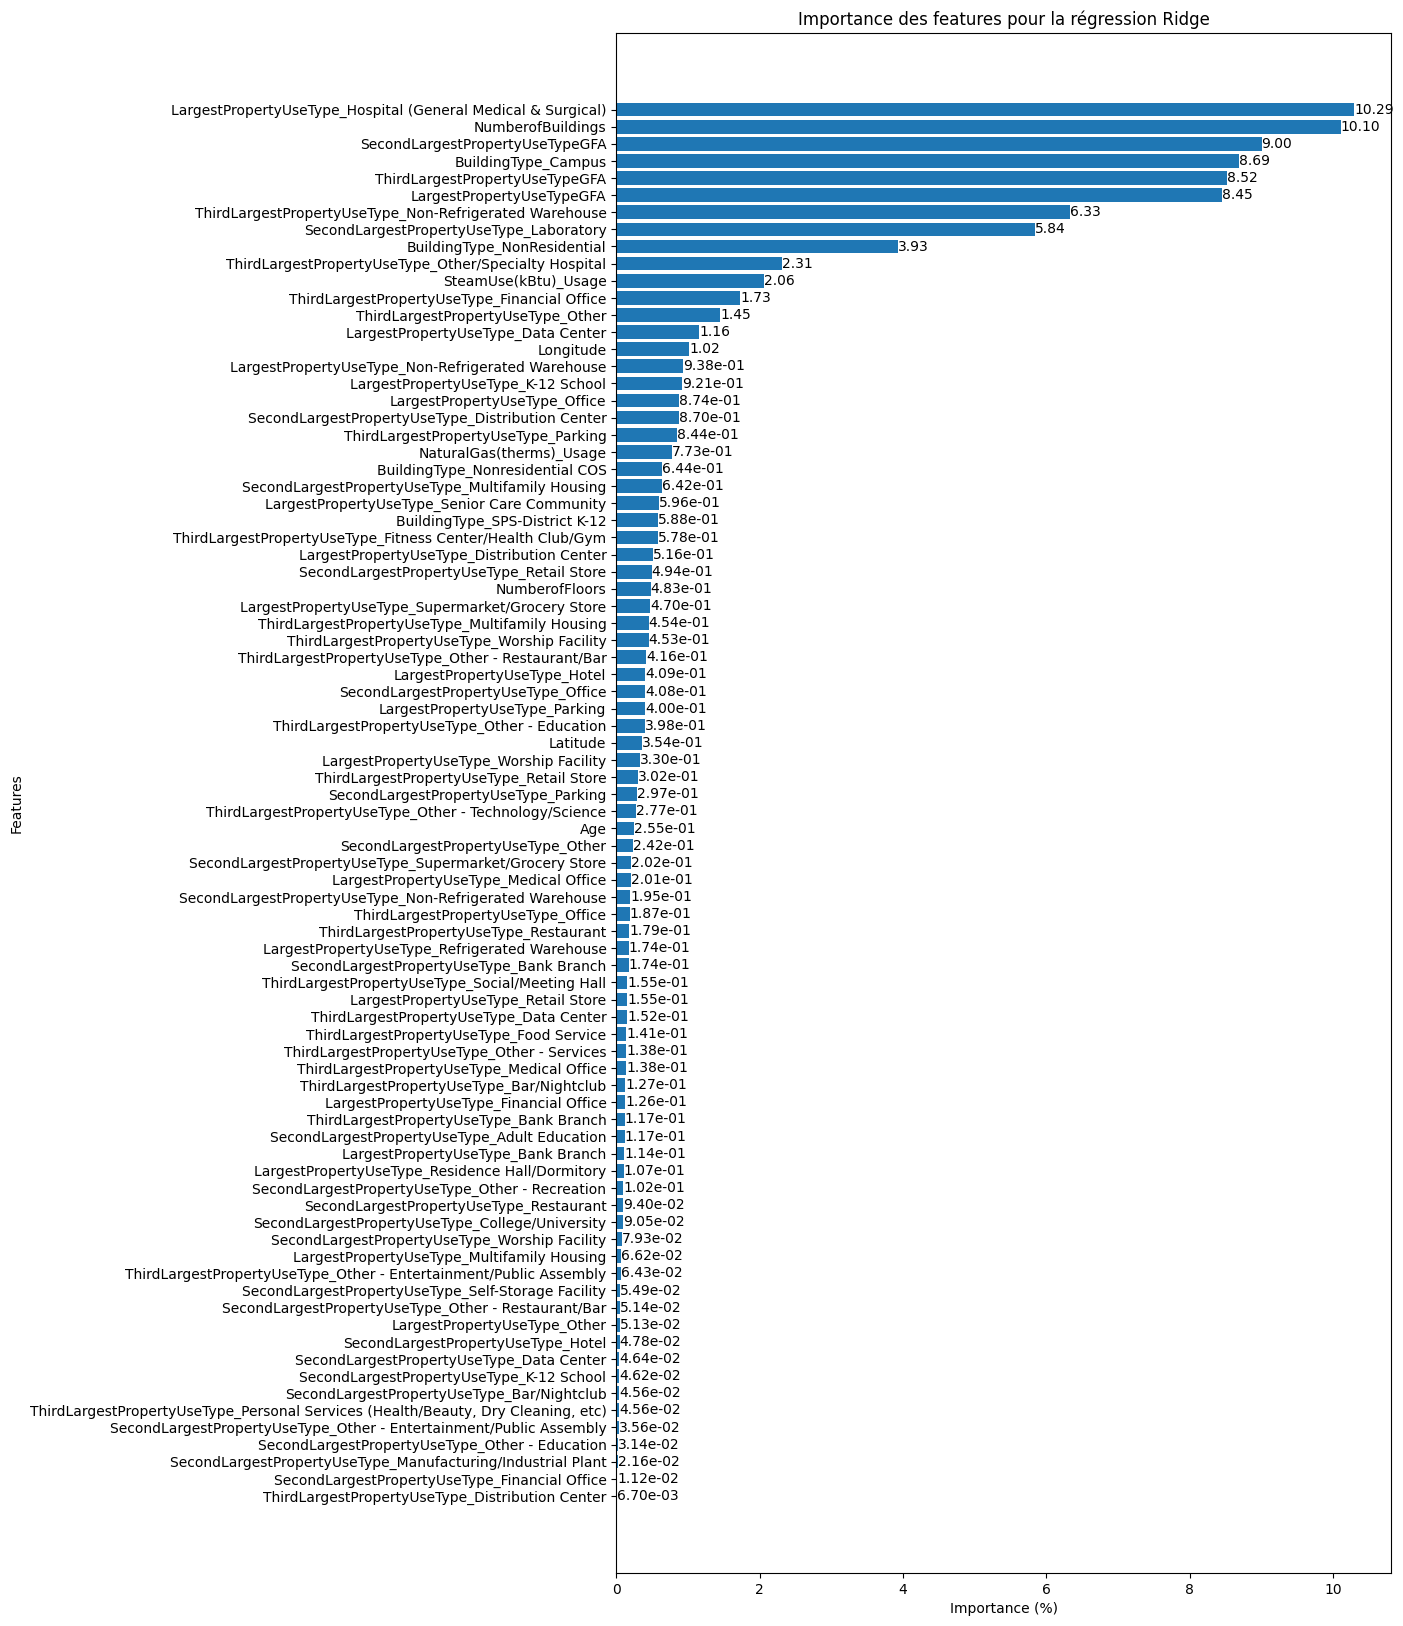

In [12]:
ridge_without_GHGE = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='ridge')

In [13]:
ridge_without_GHGE

,alpha,R2_Test,RMSE_Test,MAE_Test
Régression Ridge,1291.549665,0.570816,600.67518,176.328825


#### Régréssion Lasso

**alphas = np.logspace(-4, 4, 10)**

,Folds,alpha,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,10000.000000,-0.910046,669.906243,232.491355,3,1,3,2.333333,1
1,10,1291.549665,-0.910046,669.906243,232.491355,3,1,3,2.333333,1
2,10,166.810054,-5.765882,744.774685,216.437994,5,3,2,3.333333,3
3,5,1291.549665,-0.413810,819.188377,233.598336,1,4,6,3.666667,4
4,5,10000.000000,-0.413810,819.188377,233.598336,1,4,6,3.666667,4
5,5,166.810054,-8.613121,846.993864,205.275380,6,7,1,4.666667,6
6,10,21.544347,-27.376005,831.309532,233.257551,14,6,5,8.333333,7
7,5,21.544347,-15.636170,1059.669576,241.847187,7,14,8,9.666667,8
8,10,2.782559,-47.975280,895.368920,261.895520,15,8,9,10.666667,9
9,10,0.359381,-52.557913,913.199070,273.721536,16,9,10,11.666667,10


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_29212\3154854608.py:64: RuntimeWarning: invalid value encountered in divide
  importance_normalized = np.abs(importance) / np.sum(np.abs(importance))


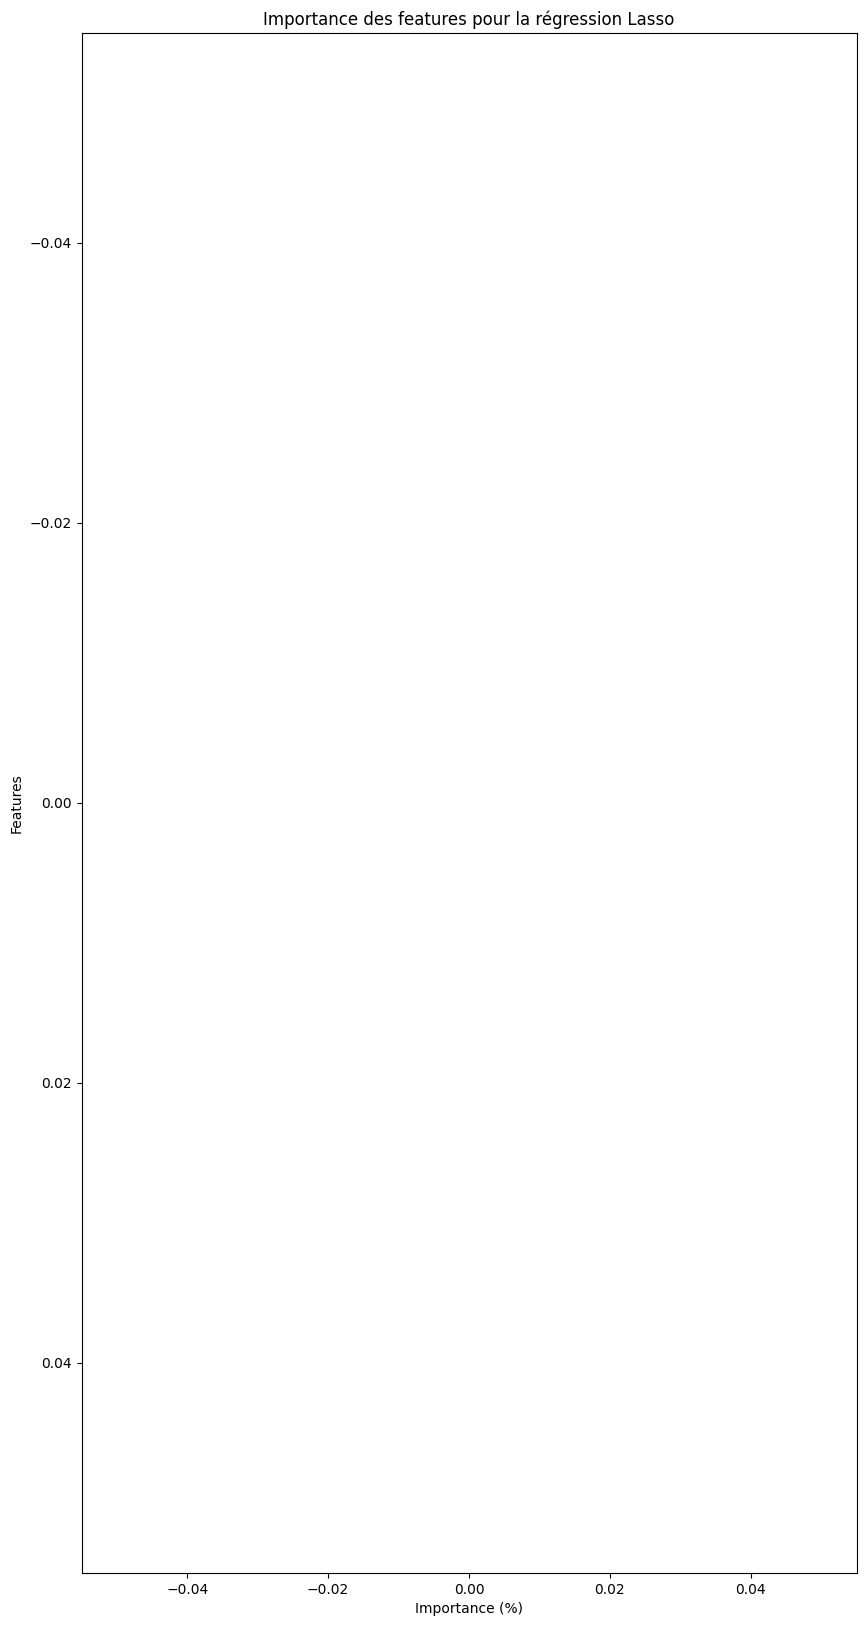

In [14]:
lasso_without_GHGE = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='lasso')

In [15]:
lasso_without_GHGE

,alpha,R2_Test,RMSE_Test,MAE_Test
Régression Lasso,10000.0,-0.001242,917.460421,247.887198


### Approche Non-Linéaire

#### XGBRegressor

**n_estimators_choices = np.linspace(100, 500, 5, dtype=int)**  
**learning_rate_choices = np.linspace(0.01, 0.5, 5)**

,Folds,n_estimators,learning_rate,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,200,0.5000,-1.985117,554.711792,140.157790,27,2,2,10.333333,1
1,10,100,0.5000,-1.985220,554.711054,140.150672,31,1,1,11.000000,2
2,10,300,0.5000,-1.985120,554.711824,140.158038,28,3,5,12.000000,3
3,10,400,0.5000,-1.985120,554.711824,140.158037,29,4,4,12.333333,4
4,10,500,0.5000,-1.985120,554.711824,140.158037,30,5,3,12.666667,5
5,10,100,0.0100,-1.639781,592.226093,140.496773,26,11,6,14.333333,6
6,5,300,0.0100,0.394975,665.791674,145.595350,3,21,22,15.333333,7
7,10,100,0.3775,-2.775104,568.650537,140.993620,33,6,7,15.333333,7
8,5,400,0.0100,0.398033,667.567772,145.856144,1,22,24,15.666667,9
9,5,200,0.0100,0.387124,671.032150,144.504046,4,24,20,16.000000,10


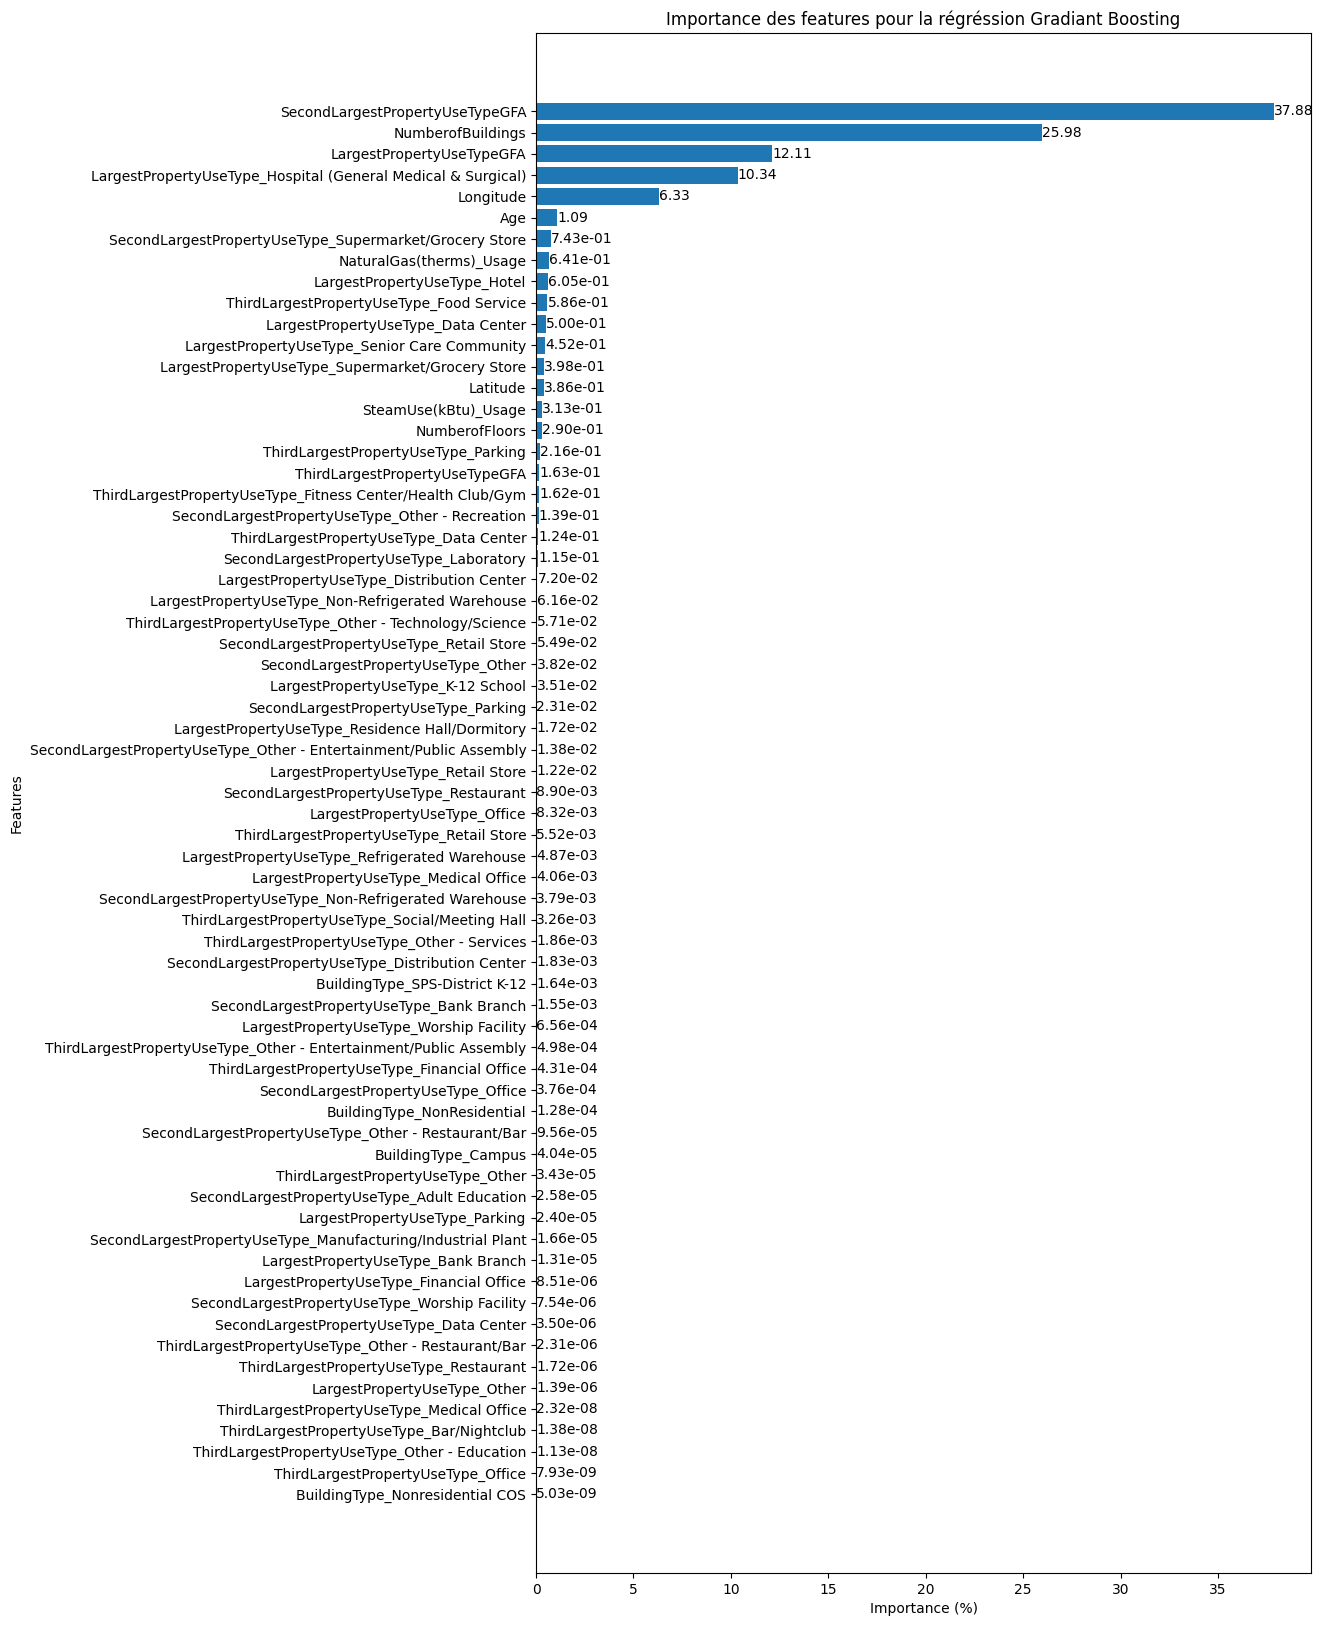

In [16]:
xgb_without_GHGE = evaluate_xgb_regressor(X_train, X_test, Y_train, Y_test)

In [17]:
xgb_without_GHGE

,n_estimators,learning_rate,R2_Test,RMSE_Test,MAE_Test
Régression XGBoost,200,0.5,0.873967,325.506536,121.953568


#### Forêt aléatoire

**n_estimators_choices = np.linspace(100, 500, 5, dtype=int)**  
**max_depth_choices = np.linspace(1, 20, 5, dtype=int)**

,Folds,n_estimators,max_depth,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,5,400,10,-2.140522,687.222065,145.763253,6,21,3,10.000000,1
1,5,500,10,-2.029827,687.500672,146.338548,2,22,9,11.000000,2
2,5,500,15,-2.032601,690.437609,146.317149,3,23,8,11.333333,3
3,5,400,15,-2.059609,691.016803,145.926311,4,25,6,11.666667,4
4,5,500,20,-2.211319,690.981747,145.837045,8,24,5,12.333333,5
5,5,400,20,-2.229899,691.025130,145.261757,9,26,2,12.333333,5
6,5,300,20,-2.295333,693.839426,145.037558,11,28,1,13.333333,7
7,5,300,10,-2.304949,691.760268,145.775545,12,27,4,14.333333,8
8,5,300,15,-2.248482,695.662846,146.038800,10,29,7,15.333333,9
9,5,200,20,-2.129999,701.873768,147.796566,5,33,10,16.000000,10


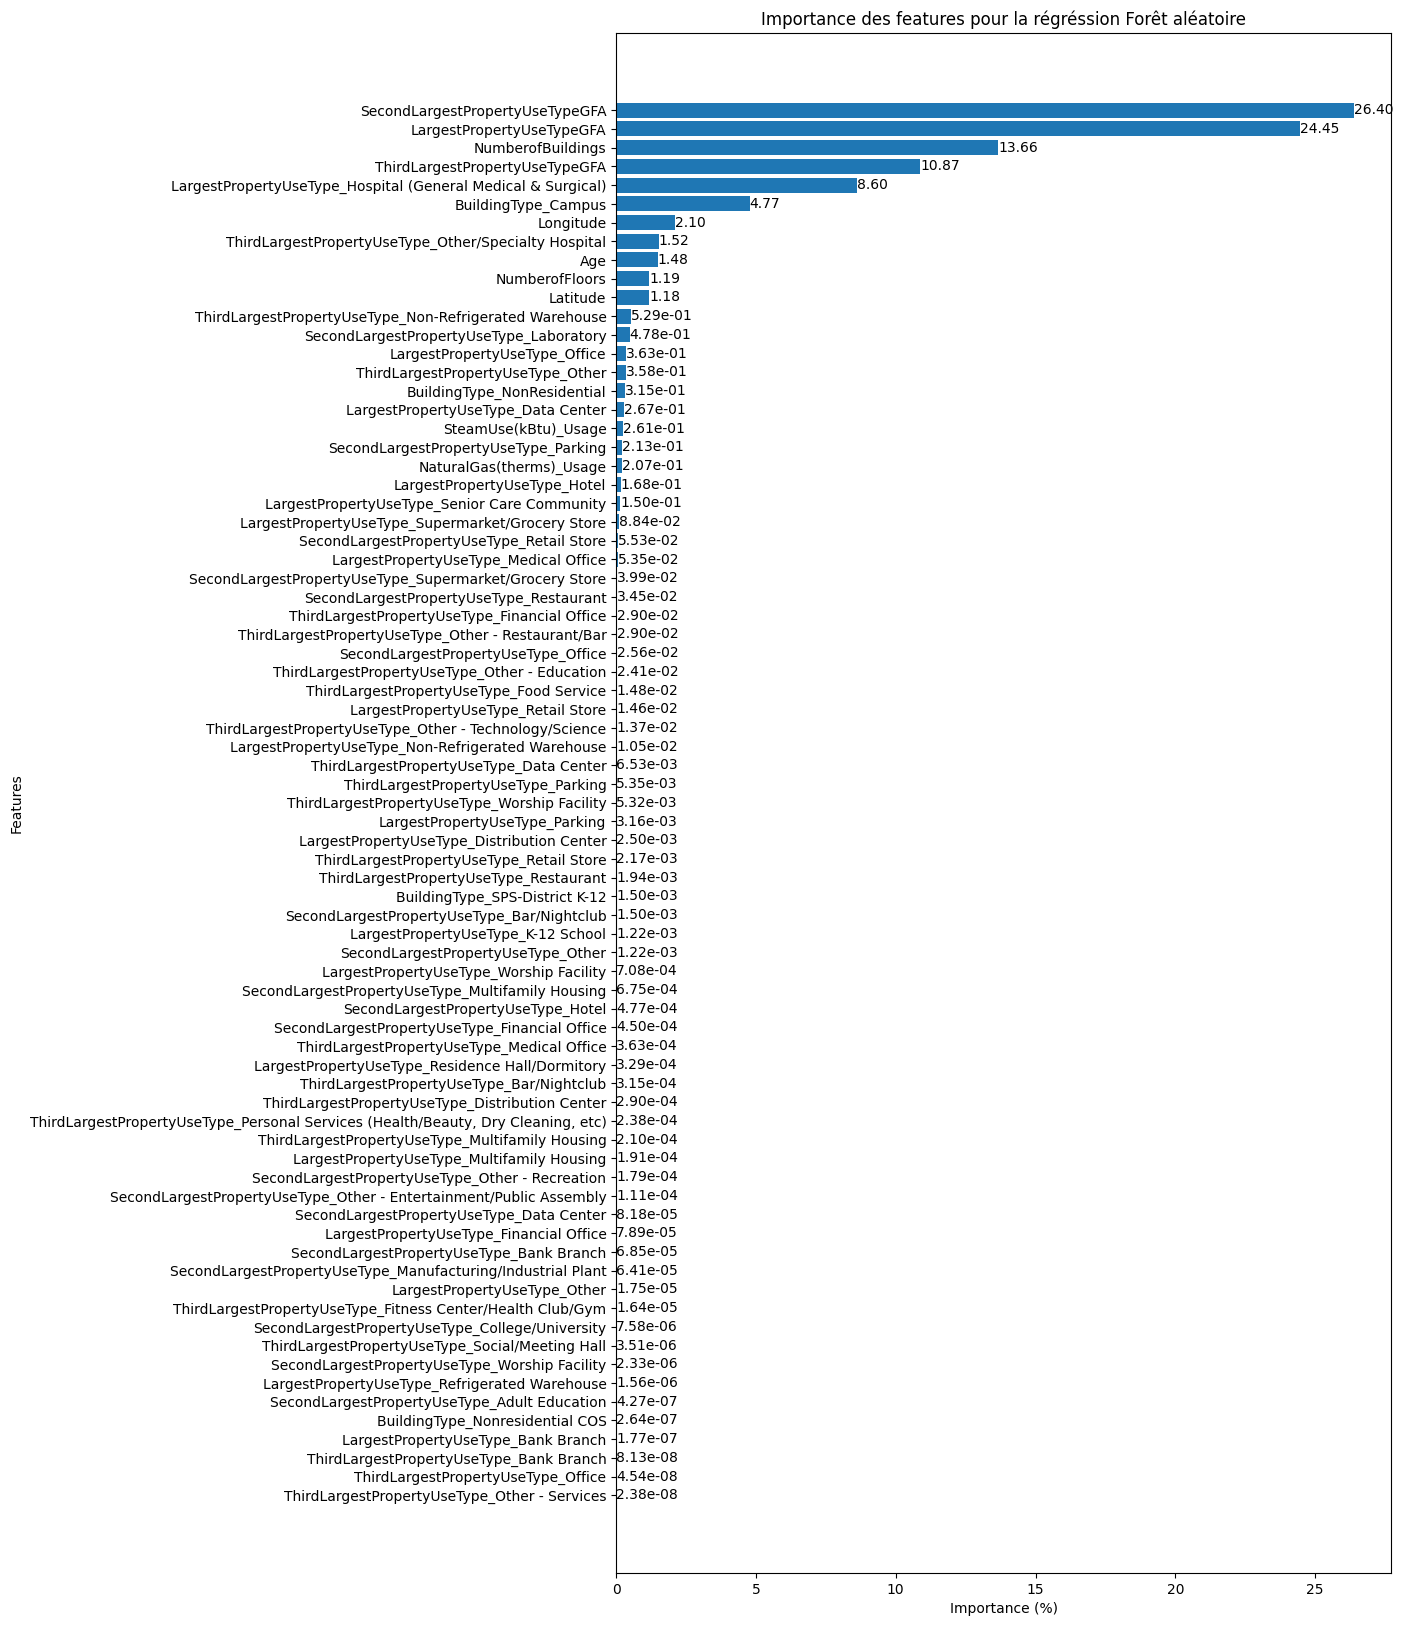

In [18]:
randomForest_without_GHGE = evaluate_random_forest(X_train, X_test, Y_train, Y_test)

In [19]:
randomForest_without_GHGE 

,n_estimators,max_depth,R2_Test,RMSE_Test,MAE_Test
Régression Random Forest,400,10,0.839438,367.399542,122.93376


## AVEC ENERGYSTARScore

On va créer X (features) et Y (target)

In [20]:
X_train, X_test, Y_train, Y_test = prepare_data(df, target_col = 'TotalGHGEmissions', cols_to_drop = ['TotalGHGEmissions', 'SiteEnergyUseWN(kBtu)'])

### Approche Naive (DummyRegressor)

In [21]:
dummy_with_GHGE = evaluate_dummy_regressor(X_train, X_test, Y_train, Y_test)

,Folds,strategy,param_value,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,quantile,0.5,-0.090407,663.100952,165.203145,3,2,1,2.000000,1
1,5,quantile,0.5,-0.042313,813.434335,165.563262,1,7,2,3.333333,2
2,10,quantile,0.75,-0.165556,656.204219,185.514990,6,1,7,4.666667,3
3,10,quantile,0.25,-0.205650,671.639907,171.934898,7,4,3,4.666667,3
4,5,quantile,0.75,-0.070064,808.444352,186.661896,2,6,8,5.333333,5
5,5,quantile,0.25,-0.094679,819.662436,172.158975,4,9,4,5.666667,6
6,10,quantile,0,-0.301165,677.409073,182.684248,8,5,5,6.000000,7
7,5,quantile,0,-0.138457,823.956578,182.957012,5,10,6,7.000000,8
8,10,mean,None,-0.910046,669.906243,232.491355,10,3,9,7.333333,9
9,5,mean,None,-0.413810,819.188377,233.598336,9,8,10,9.000000,10


In [22]:
dummy_with_GHGE

,Strategy,Parameter Value,R2_Test,RMSE_Test,MAE_Test
Régréssion Dummy,quantile,0.5,-0.036097,933.292788,196.253947


### Approche Linéaire

#### Régréssion Ridge

,Folds,alpha,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,1291.549665,-1.088638,616.400722,181.081259,4,1,2,2.333333,1
1,10,10000.000000,-0.505578,635.200753,210.995617,2,2,4,2.666667,2
2,5,1291.549665,-1.031647,732.741075,178.667692,3,4,1,2.666667,2
3,5,10000.000000,-0.202566,784.272107,212.533454,1,6,5,4.000000,4
4,5,166.810054,-4.686659,753.728202,200.696759,5,5,3,4.333333,5
5,10,166.810054,-8.614423,702.124721,214.837385,6,3,6,5.000000,6
6,5,21.544347,-13.354086,930.504036,252.706618,7,14,7,9.333333,7
7,10,21.544347,-29.517752,821.175476,256.132483,14,7,8,9.666667,8
8,10,2.782559,-47.783619,887.042114,274.207645,15,8,9,10.666667,9
9,10,0.359381,-52.140997,900.536679,277.670961,16,9,10,11.666667,10


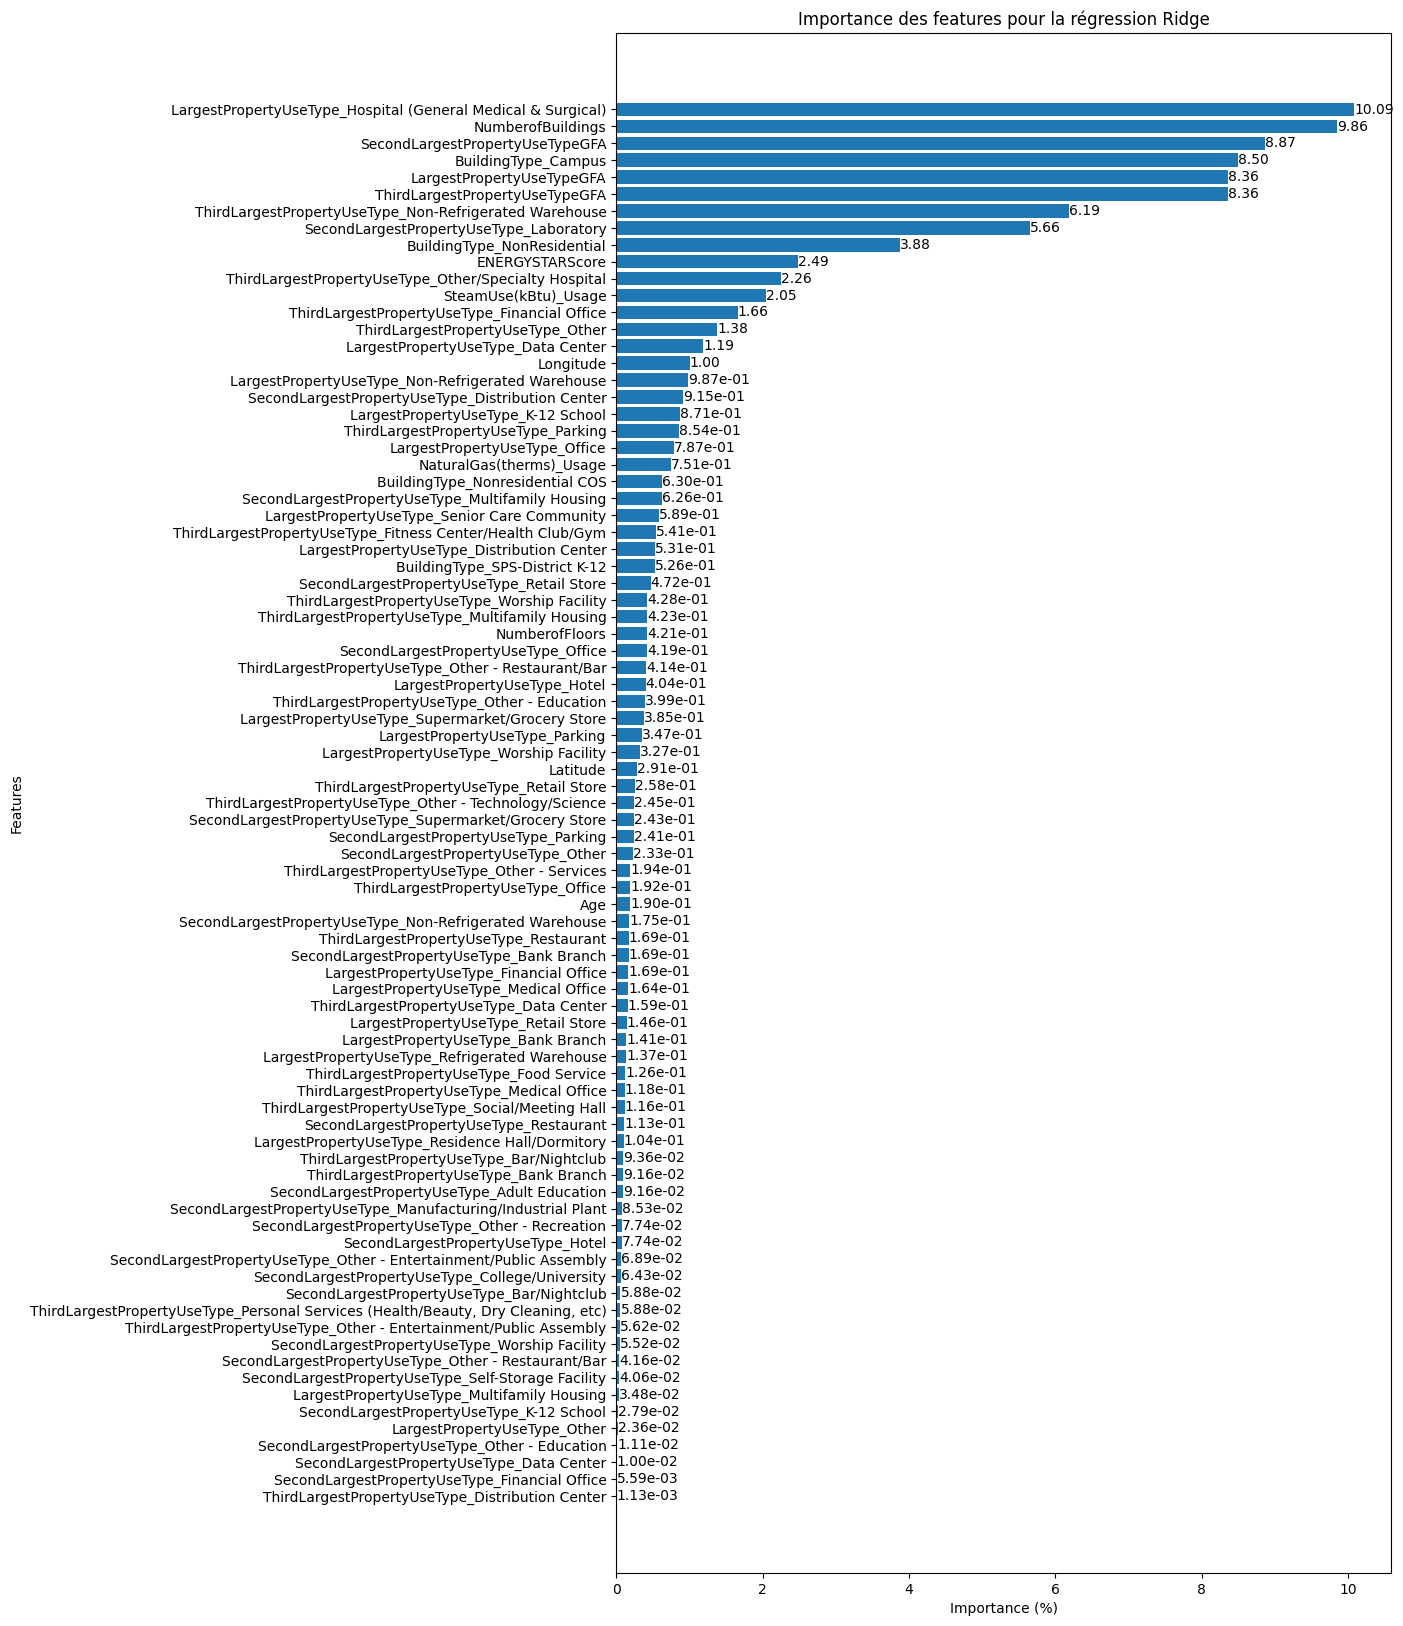

In [23]:
ridge_with_GHGE = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='ridge')

In [24]:
ridge_with_GHGE

,alpha,R2_Test,RMSE_Test,MAE_Test
Régression Ridge,1291.549665,0.573363,598.890084,173.930803


#### Régréssion Lasso

,Folds,alpha,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,10,10000.000000,-0.910046,669.906243,232.491355,3,1,3,2.333333,1
1,10,1291.549665,-0.910046,669.906243,232.491355,3,1,3,2.333333,1
2,10,166.810054,-5.765882,744.774685,216.437994,5,3,2,3.333333,3
3,5,1291.549665,-0.413810,819.188377,233.598336,1,4,6,3.666667,4
4,5,10000.000000,-0.413810,819.188377,233.598336,1,4,6,3.666667,4
5,5,166.810054,-8.613121,846.993864,205.275380,6,7,1,4.666667,6
6,10,21.544347,-27.125370,824.335925,233.284209,14,6,5,8.333333,7
7,5,21.544347,-15.410450,1053.308786,242.483224,7,14,8,9.666667,8
8,10,2.782559,-47.485853,882.266085,263.706361,15,8,9,10.666667,9
9,10,0.359381,-52.146536,899.610212,276.018897,16,9,10,11.666667,10


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_29212\3154854608.py:64: RuntimeWarning: invalid value encountered in divide
  importance_normalized = np.abs(importance) / np.sum(np.abs(importance))


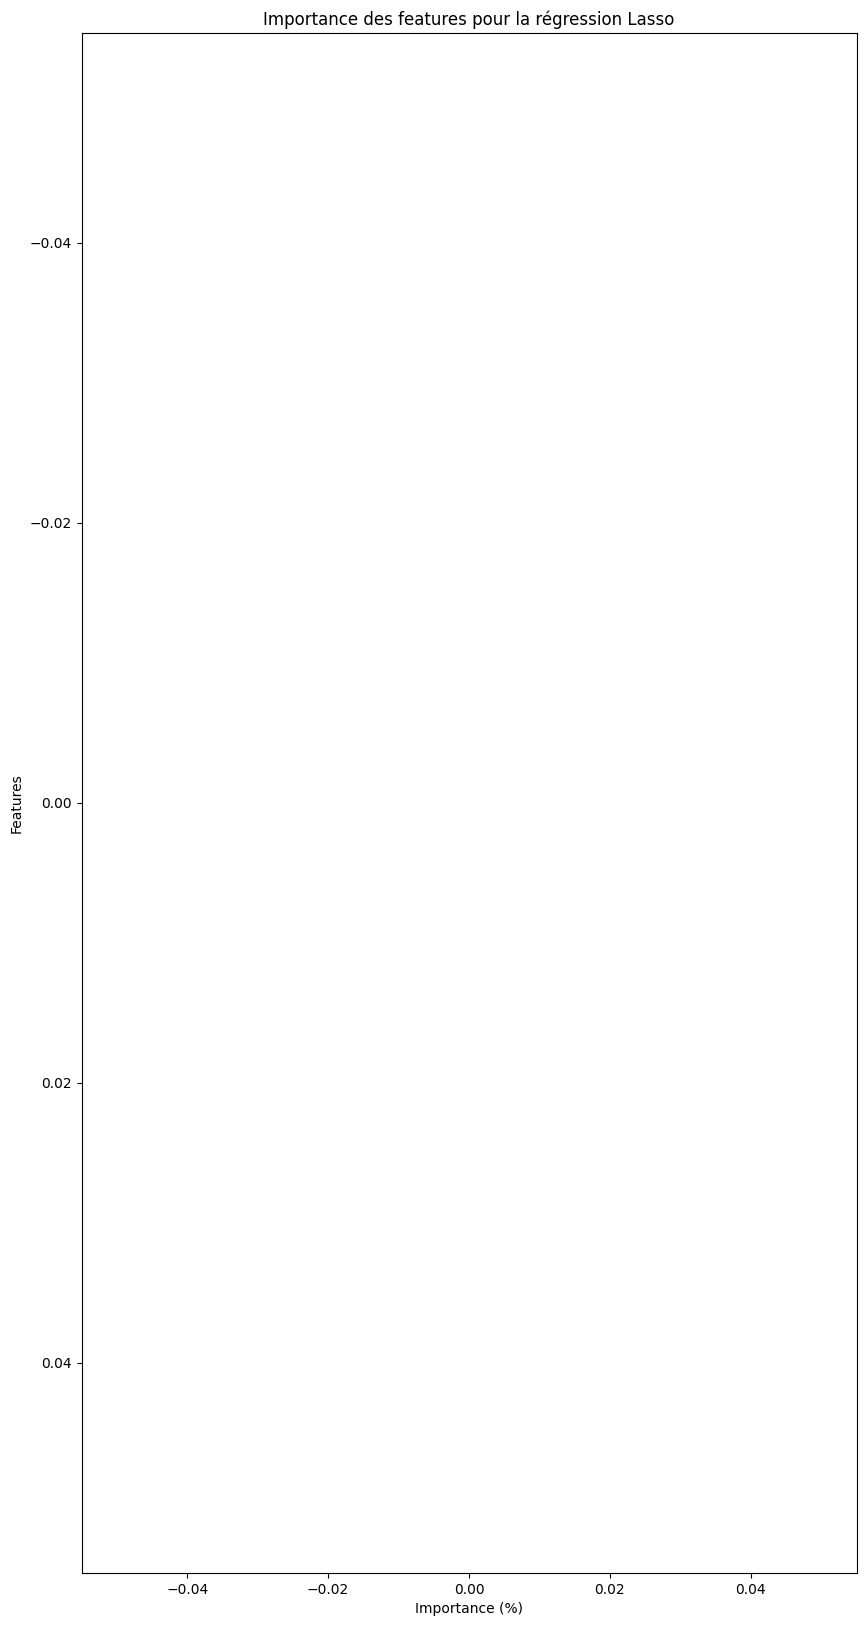

In [25]:
lasso_with_GHGE = evaluate_linear_regressor(X_train, X_test, Y_train, Y_test, regressor='lasso')

In [26]:
lasso_with_GHGE 

,alpha,R2_Test,RMSE_Test,MAE_Test
Régression Lasso,10000.0,-0.001242,917.460421,247.887198


### Approche Non-Linéaire

#### XGBRegressor

,Folds,n_estimators,learning_rate,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,5,300,0.0100,0.396843,656.186099,142.979196,2,20,14,12.000000,1
1,10,200,0.5000,-2.011865,557.636156,140.694046,28,1,8,12.333333,2
2,10,100,0.5000,-2.011755,557.637866,140.682619,27,5,7,13.000000,3
3,10,200,0.3775,-2.903565,567.608074,138.639030,33,6,2,13.666667,4
4,10,500,0.5000,-2.011866,557.636202,140.694101,29,2,11,14.000000,5
5,10,400,0.5000,-2.011866,557.636202,140.694101,30,3,10,14.333333,6
6,10,100,0.0100,-1.643851,592.499590,139.919438,26,11,6,14.333333,6
7,10,100,0.3775,-2.903116,567.622103,138.595997,32,10,1,14.333333,6
8,10,300,0.5000,-2.011866,557.636202,140.694101,31,4,9,14.666667,9
9,10,300,0.3775,-2.903574,567.608101,138.640602,34,7,3,14.666667,9


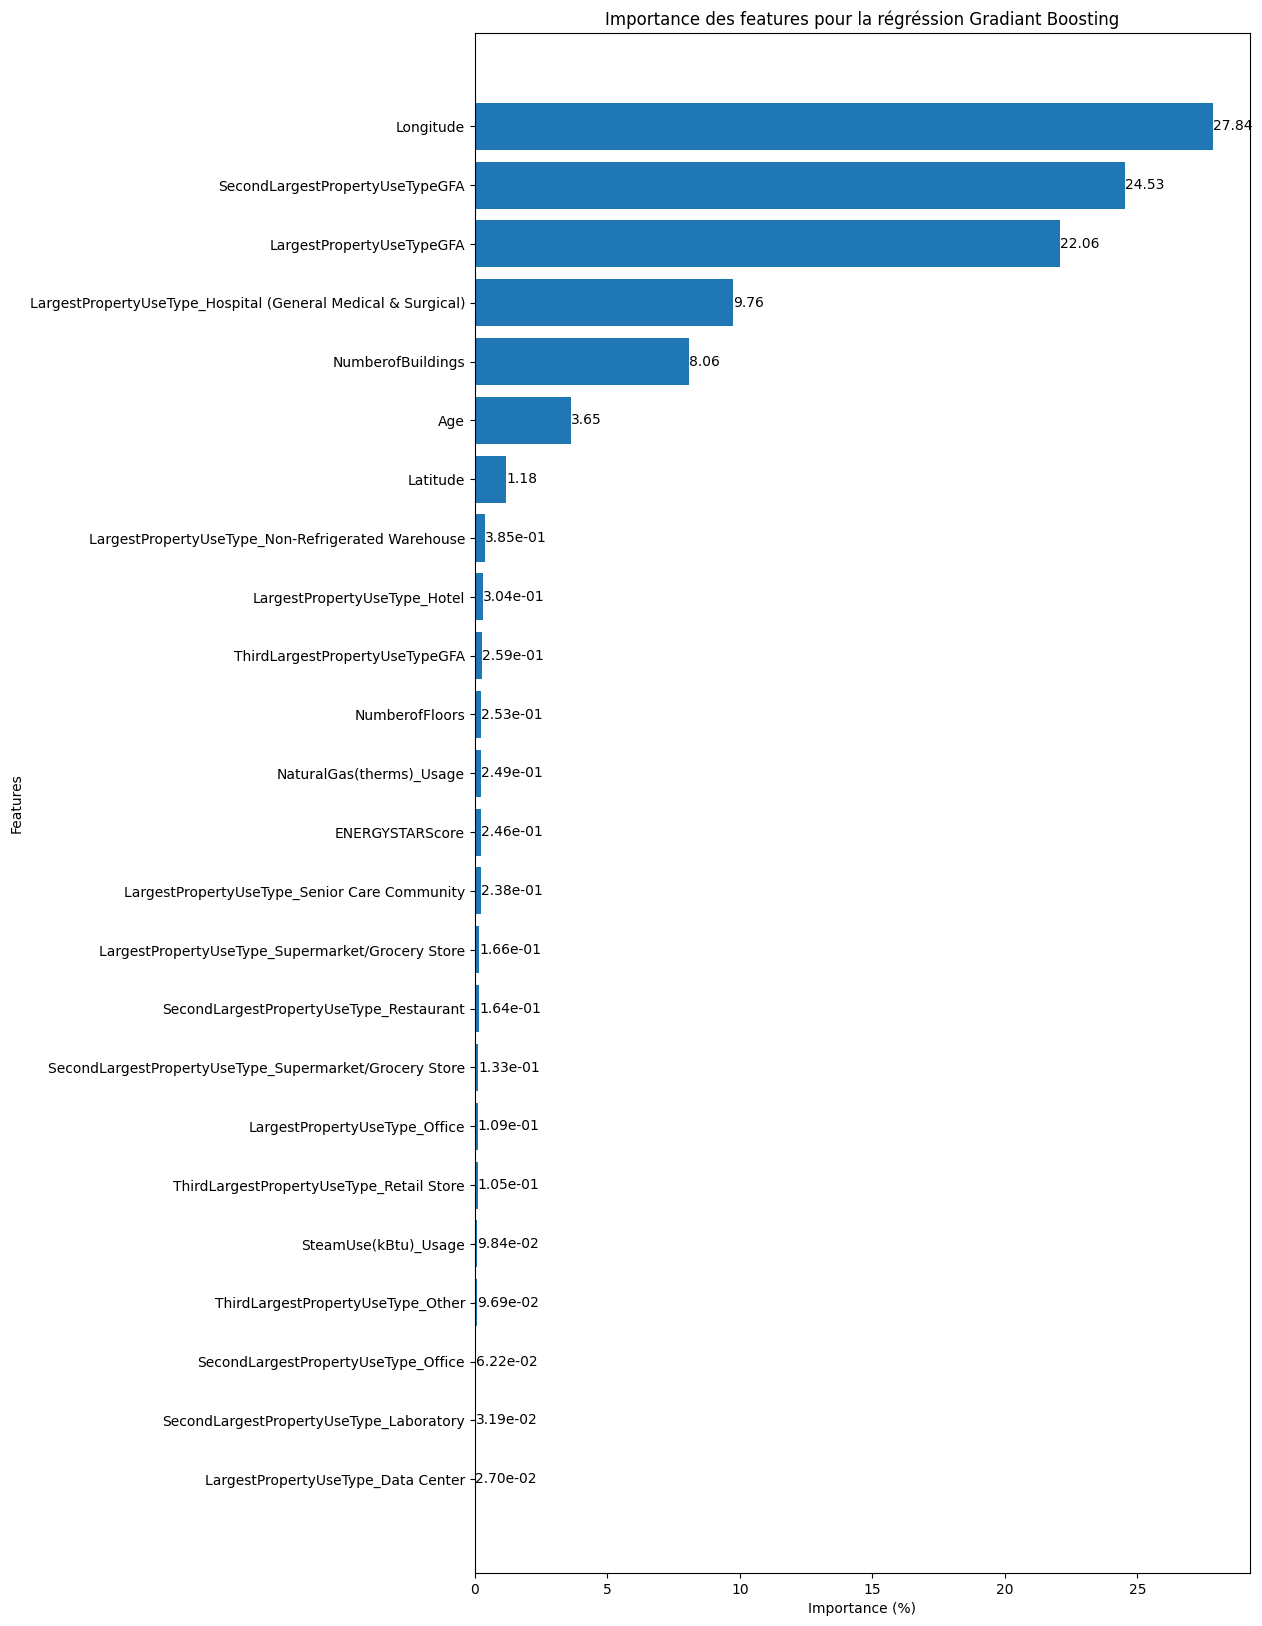

In [27]:
xgb_with_GHGE = evaluate_xgb_regressor(X_train, X_test, Y_train, Y_test)

In [28]:
xgb_with_GHGE

,n_estimators,learning_rate,R2_Test,RMSE_Test,MAE_Test
Régression XGBoost,300,0.01,0.874966,324.213775,113.656391


#### Forêt aléatoire

,Folds,n_estimators,max_depth,R2,RMSE,MAE,R2_rank,RMSE_rank,MAE_rank,Aggregate_rank,Rank_final
0,5,400,20,-1.769421,687.800313,144.457445,6,23,2,10.333333,1
1,5,300,20,-1.785037,687.937759,144.342072,8,24,1,11.000000,2
2,5,200,20,-1.636310,688.406868,145.282116,2,25,7,11.333333,3
3,5,400,10,-1.994116,686.551903,144.868445,13,21,5,13.000000,4
4,5,300,10,-2.107190,687.363432,144.795059,17,22,4,14.333333,5
5,5,500,20,-1.783678,689.560001,145.378833,7,29,8,14.666667,6
6,10,500,20,-4.360911,655.869855,152.925679,26,2,17,15.000000,7
7,5,200,15,-1.911778,688.468322,145.419289,10,26,9,15.000000,7
8,5,500,10,-1.927047,688.549687,145.817644,11,27,12,16.666667,9
9,10,500,15,-4.476087,656.695938,152.863631,31,3,16,16.666667,9


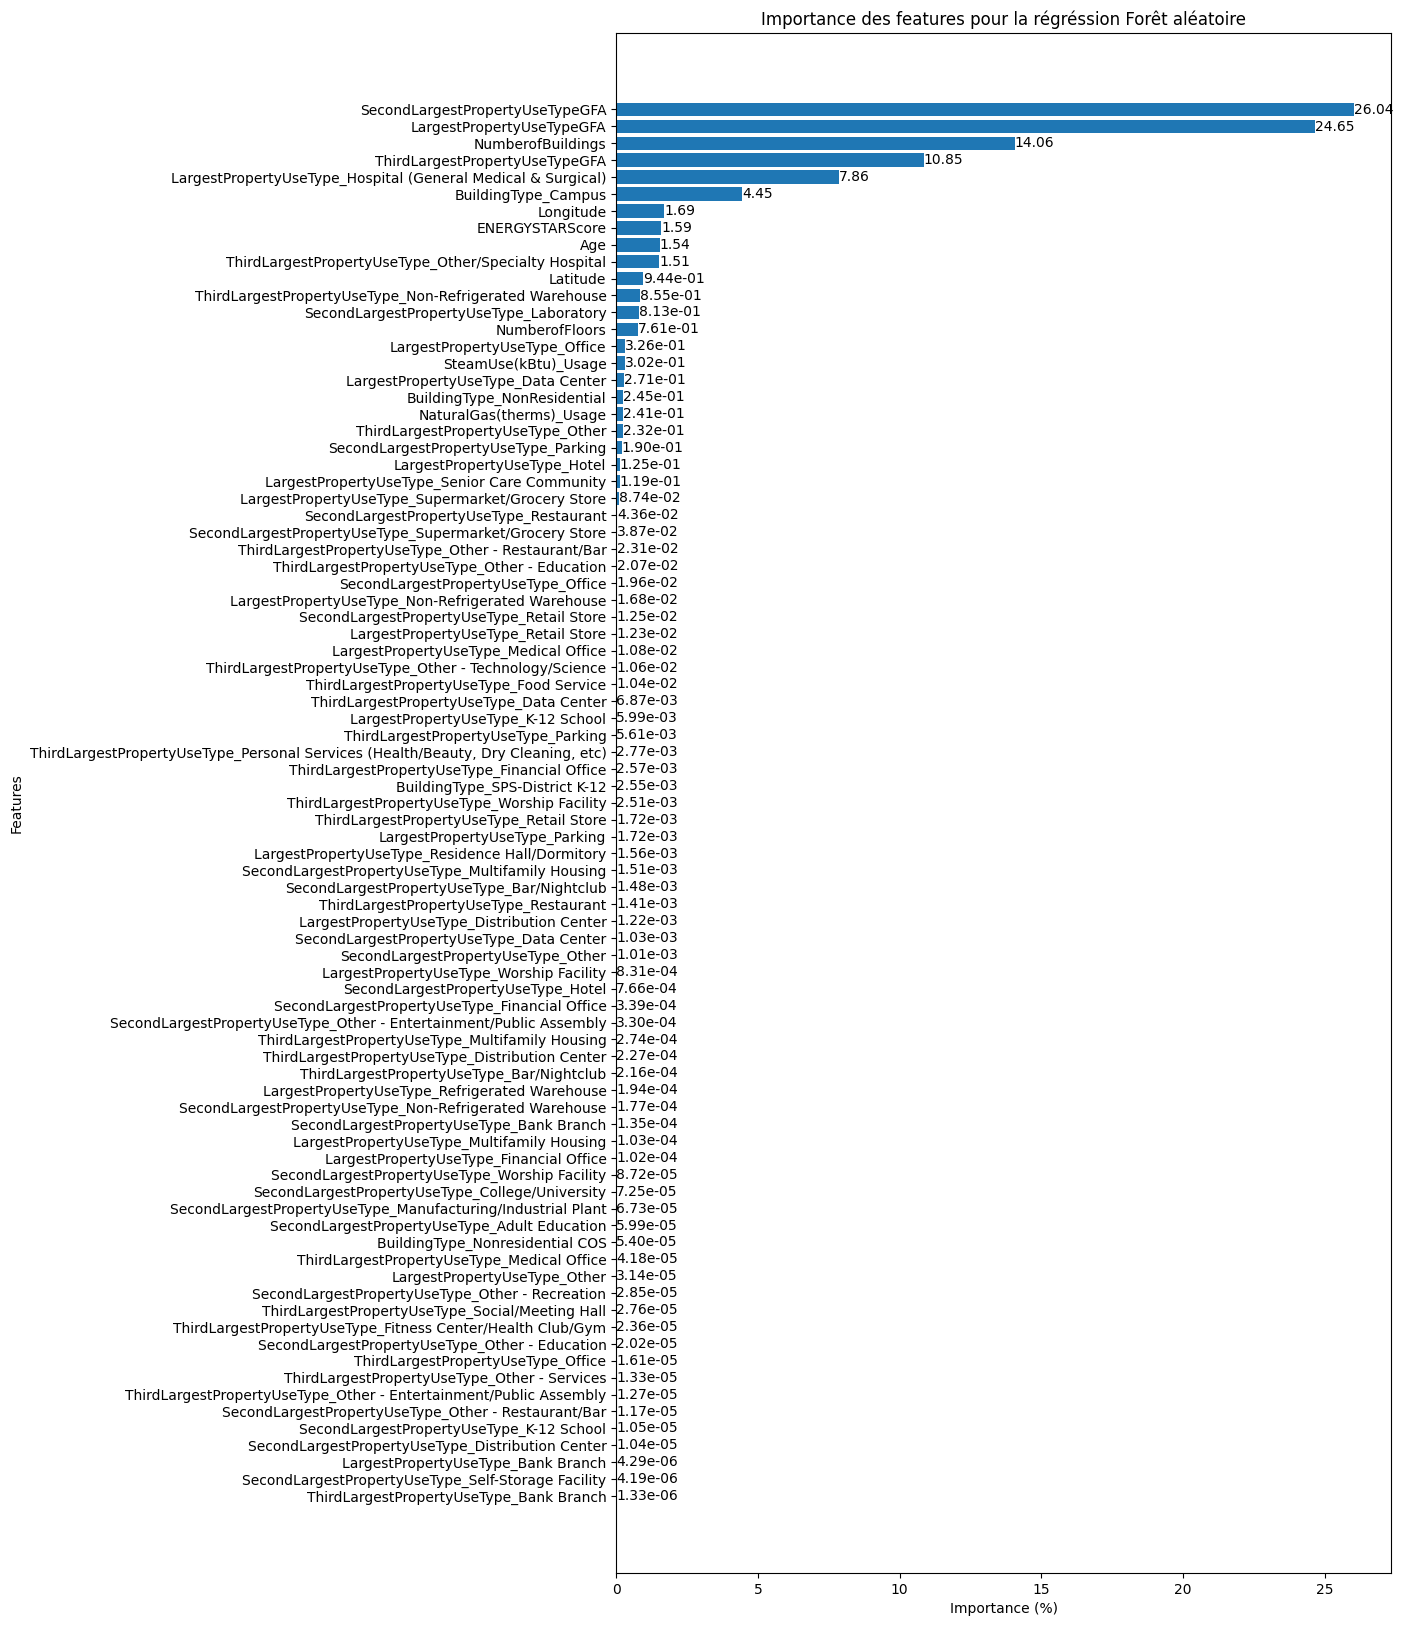

In [29]:
randomForest_with_GHGE = evaluate_random_forest(X_train, X_test, Y_train, Y_test)

In [30]:
randomForest_with_GHGE 

,n_estimators,max_depth,R2_Test,RMSE_Test,MAE_Test
Régression Random Forest,400,20,0.847409,358.164731,116.972909


# Comparaisons

## Target #1 : TotalGHGEmissions

In [31]:
a_wo = dummy_without_GHGE 
a_wo = a_wo.rename(index={'Régréssion Dummy': 'Dummy (SANS ESS)'})
a_wo = a_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
a_wo

,R2_Test,RMSE_Test,MAE_Test
Dummy (SANS ESS),-0.036097,933.292788,196.253947


In [32]:
b_wo = ridge_without_GHGE 
b_wo = b_wo.rename(index={'Régression Ridge': 'Ridge (SANS ESS)'})
b_wo = b_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
b_wo

,R2_Test,RMSE_Test,MAE_Test
Ridge (SANS ESS),0.570816,600.67518,176.328825


In [33]:
c_wo = lasso_without_GHGE 
c_wo = c_wo.rename(index={'Régression Lasso': 'Lasso (SANS ESS)'})
c_wo = c_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
c_wo

,R2_Test,RMSE_Test,MAE_Test
Lasso (SANS ESS),-0.001242,917.460421,247.887198


In [34]:
d_wo = xgb_without_GHGE 
d_wo = d_wo.rename(index={'Régression XGBoost': 'XGBoost (SANS ESS)'})
d_wo = d_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
d_wo

,R2_Test,RMSE_Test,MAE_Test
XGBoost (SANS ESS),0.873967,325.506536,121.953568


In [35]:
e_wo = randomForest_without_GHGE 
e_wo = e_wo.rename(index={'Régression Random Forest': 'Random Forest (SANS ESS)'})
e_wo = e_wo.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
e_wo

,R2_Test,RMSE_Test,MAE_Test
Random Forest (SANS ESS),0.839438,367.399542,122.93376


In [36]:
df_merged_wo = pd.concat([a_wo, b_wo,c_wo,d_wo,e_wo])

df_merged_wo

,R2_Test,RMSE_Test,MAE_Test
Dummy (SANS ESS),-0.036097,933.292788,196.253947
Ridge (SANS ESS),0.570816,600.675180,176.328825
Lasso (SANS ESS),-0.001242,917.460421,247.887198
XGBoost (SANS ESS),0.873967,325.506536,121.953568
Random Forest (SANS ESS),0.839438,367.399542,122.933760


In [37]:
def highlight_max_min(df):
    # Définir une fonction pour appliquer le style CSS
    def apply_style(series):
        min_value = series.min()
        max_value = series.max()
        colors = []
        for val in series:
            if series.name == 'R2_Test':
                color = 'green' if val == max_value else 'crimson' if val == min_value else ''
            else:  # for 'RMSE_Test' and 'MAE_Test'
                color = 'green' if val == min_value else 'crimson' if val == max_value else ''
            colors.append(f'background-color: {color}' if color else '')
        return colors

    df_styled = df.style.apply(apply_style)
    
    return df_styled

df_merged_styled_wo = highlight_max_min(df_merged_wo)
df_merged_styled_wo


,R2_Test,RMSE_Test,MAE_Test
Dummy (SANS ESS),-0.036097,933.292788,196.253947
Ridge (SANS ESS),0.570816,600.675180,176.328825
Lasso (SANS ESS),-0.001242,917.460421,247.887198
XGBoost (SANS ESS),0.873967,325.506536,121.953568
Random Forest (SANS ESS),0.839438,367.399542,122.933760


In [38]:
a_w = dummy_with_GHGE 
a_w = a_w.rename(index={'Régréssion Dummy': 'Dummy (AVEC ESS)'})
a_w = a_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
a_w

,R2_Test,RMSE_Test,MAE_Test
Dummy (AVEC ESS),-0.036097,933.292788,196.253947


In [39]:
b_w = ridge_with_GHGE 
b_w = b_w.rename(index={'Régression Ridge': 'Ridge (AVEC ESS)'})
b_w = b_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
b_w

,R2_Test,RMSE_Test,MAE_Test
Ridge (AVEC ESS),0.573363,598.890084,173.930803


In [40]:
c_w = lasso_with_GHGE 
c_w = c_w.rename(index={'Régression Lasso': 'Lasso (AVEC ESS)'})
c_w = c_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
c_w

,R2_Test,RMSE_Test,MAE_Test
Lasso (AVEC ESS),-0.001242,917.460421,247.887198


In [41]:
d_w = xgb_with_GHGE 
d_w = d_w.rename(index={'Régression XGBoost': 'XGBoost (AVEC ESS)'})
d_w = d_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
d_w

,R2_Test,RMSE_Test,MAE_Test
XGBoost (AVEC ESS),0.874966,324.213775,113.656391


In [42]:
e_w = randomForest_with_GHGE 
e_w = e_w.rename(index={'Régression Random Forest': 'Random Forest (AVEC ESS)'})
e_w = e_w.loc[:, ['R2_Test', 'RMSE_Test', 'MAE_Test']]
e_w

,R2_Test,RMSE_Test,MAE_Test
Random Forest (AVEC ESS),0.847409,358.164731,116.972909


In [43]:
df_merged_w = pd.concat([a_w, b_w,c_w,d_w,e_w])

df_merged_w

,R2_Test,RMSE_Test,MAE_Test
Dummy (AVEC ESS),-0.036097,933.292788,196.253947
Ridge (AVEC ESS),0.573363,598.890084,173.930803
Lasso (AVEC ESS),-0.001242,917.460421,247.887198
XGBoost (AVEC ESS),0.874966,324.213775,113.656391
Random Forest (AVEC ESS),0.847409,358.164731,116.972909


In [44]:
df_merged_styled_w = highlight_max_min(df_merged_w)
df_merged_styled_w

,R2_Test,RMSE_Test,MAE_Test
Dummy (AVEC ESS),-0.036097,933.292788,196.253947
Ridge (AVEC ESS),0.573363,598.890084,173.930803
Lasso (AVEC ESS),-0.001242,917.460421,247.887198
XGBoost (AVEC ESS),0.874966,324.213775,113.656391
Random Forest (AVEC ESS),0.847409,358.164731,116.972909


In [45]:
# Supprimer " (SANS ESS)" et " (AVEC ESS)" des index
df_merged_wo.index = df_merged_wo.index.str.replace(" \(SANS ESS\)", "")
df_merged_w.index = df_merged_w.index.str.replace(" \(AVEC ESS\)", "")

# Assurez-vous que les indices correspondent pour la soustraction
df_merged_wo = df_merged_wo.reindex(df_merged_w.index)

# Soustraire df_merged_w de df_merged_wo
df_result = df_merged_wo - df_merged_w

# Afficher le résultat
df_result


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_29212\2870740796.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged_wo.index = df_merged_wo.index.str.replace(" \(SANS ESS\)", "")
C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_29212\2870740796.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_merged_w.index = df_merged_w.index.str.replace(" \(AVEC ESS\)", "")


,R2_Test,RMSE_Test,MAE_Test
Dummy,0.000000,0.000000,0.000000
Ridge,-0.002547,1.785097,2.398022
Lasso,0.000000,0.000000,0.000000
XGBoost,-0.000999,1.292761,8.297177
Random Forest,-0.007970,9.234812,5.960851


In [46]:
def color_cells(val):
    """
    Prend une valeur scalaire et renvoie une chaîne avec
    les propriétés css à être rendues dans la cellule.
    """
    if val < 0:
        color = 'green'
    else:
        color = 'crimson'
    return 'background-color: %s' % color

def highlight_df(df):
    r2_style = df['R2_Test'].apply(color_cells)
    rmse_style = df['RMSE_Test'].apply(lambda x: color_cells(-x))  # Inverser la condition
    mae_style = df['MAE_Test'].apply(lambda x: color_cells(-x))  # Inverser la condition
    df_style = pd.concat([r2_style, rmse_style, mae_style], axis=1)
    return df_style

df_result.style.apply(highlight_df, axis=None)


,R2_Test,RMSE_Test,MAE_Test
Dummy,0.000000,0.000000,0.000000
Ridge,-0.002547,1.785097,2.398022
Lasso,0.000000,0.000000,0.000000
XGBoost,-0.000999,1.292761,8.297177
Random Forest,-0.007970,9.234812,5.960851


Conclusion : 
- XGBoost est le meilleur algo à utiliser
- Rajouter la feature ENERGYSTARScore augmente la performance de nos modèles